In [1]:
from numpy import diff, tanh
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def dl_dw11_dx6(x, nn_parameters):
    w11, w12, w21, w22, b11, b12, b2 = nn_parameters
    grad = (-272*w11**6*w21*(1 - tanh(b11 + w11*x)**2)**3*tanh(b11 + w11*x) + 416*w11**6*w21*(1 - tanh(b11 + w11*x)**2)**2*tanh(b11 + w11*x)**3 - 32*w11**6*w21*(1 - tanh(b11 + w11*x)**2)*tanh(b11 + w11*x)**5 - 272*w12**6*w22*(1 - tanh(b12 + w12*x)**2)**3*tanh(b12 + w12*x) + 416*w12**6*w22*(1 - tanh(b12 + w12*x)**2)**2*tanh(b12 + w12*x)**3 - 32*w12**6*w22*(1 - tanh(b12 + w12*x)**2)*tanh(b12 + w12*x)**5)*(-544*w11**6*w21*x*(1 - tanh(b11 + w11*x)**2)**4 + 5760*w11**6*w21*x*(1 - tanh(b11 + w11*x)**2)**3*tanh(b11 + w11*x)**2 - 3648*w11**6*w21*x*(1 - tanh(b11 + w11*x)**2)**2*tanh(b11 + w11*x)**4 + 128*w11**6*w21*x*(1 - tanh(b11 + w11*x)**2)*tanh(b11 + w11*x)**6 - 3264*w11**5*w21*(1 - tanh(b11 + w11*x)**2)**3*tanh(b11 + w11*x) + 4992*w11**5*w21*(1 - tanh(b11 + w11*x)**2)**2*tanh(b11 + w11*x)**3 - 384*w11**5*w21*(1 - tanh(b11 + w11*x)**2)*tanh(b11 + w11*x)**5)
    return grad


In [3]:
grad_list = []
for i in range(2000):
    x = np.random.rand(1)
    nn_parameters = list(np.random.rand(7)* 2 - 1) 
    nn_parameters[0] = nn_parameters[0]*2
    grad = dl_dw11_dx6(x, nn_parameters)[0]
    grad_list += [[nn_parameters[0], grad]]

grad_ar = np.array(grad_list)

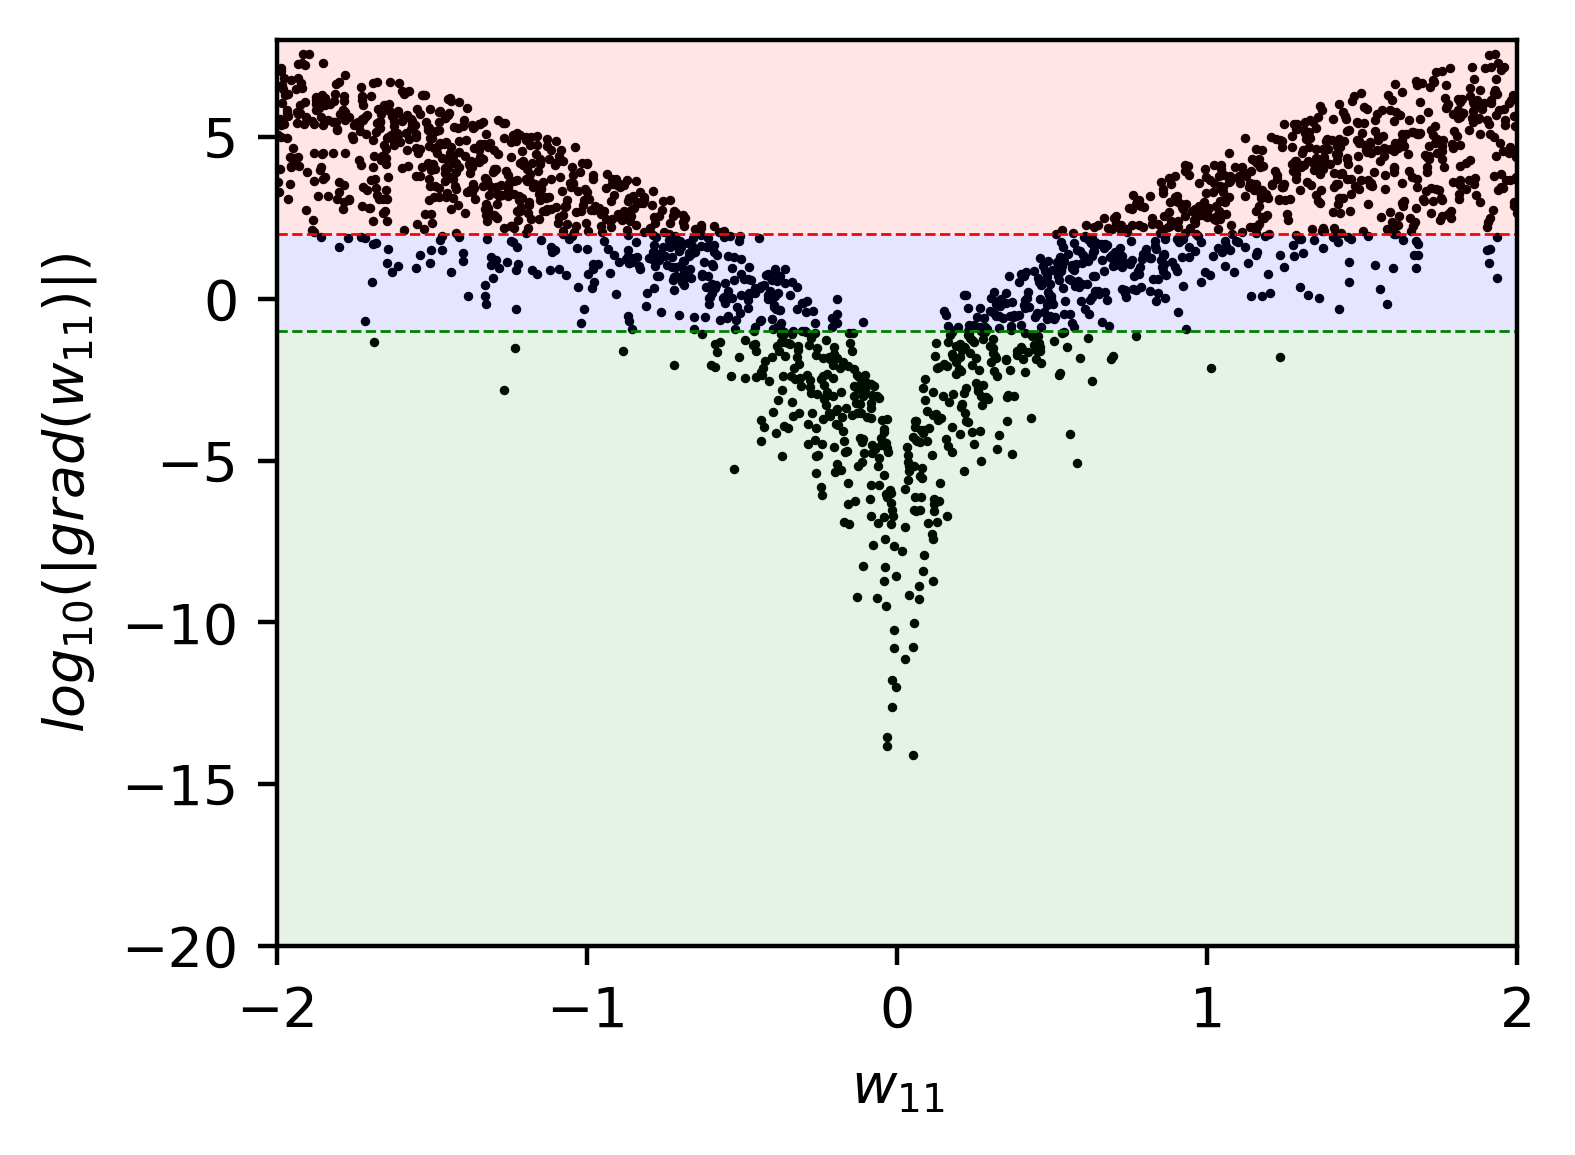

In [4]:
%matplotlib inline
x = [-2, 2]
y1 = [2, 2]
y2 = [-1, -1]
plt.figure(figsize=(4, 3), dpi=400)

grad = np.log10(np.abs(grad_ar[:, 1]))
plt.scatter(grad_ar[:, 0], grad, s=0.5, c='k')
plt.plot(x, y1, c='r', linestyle='--', linewidth=0.5)
plt.plot(x, y2, c='g', linestyle='--', linewidth=0.5)
plt.fill_between(x, y1, 8, facecolor='r', alpha=0.1)
plt.fill_between(x, -20, y2, facecolor='g', alpha=0.1)
plt.fill_between(x, y2, y1, facecolor='b', alpha=0.1)
plt.xlim(-2, 2)
plt.ylim(-20, 8)
plt.xlabel('$ w_{11} $')
plt.ylabel('$ log_{10}( {| grad(w_{11}) |}) $') # {\left|{w_11}\right|} 
plt.show()

In [5]:
def dl_dw11_dx2(x, nn_parameters):
    w11, w12, w21, w22, b11, b12, b2 = nn_parameters
    grad = (-2*w11**2*w21*(1 - tanh(b11 + w11*x)**2)*tanh(b11 + w11*x) - 2*w12**2*w22*(1 - tanh(b12 + w12*x)**2)*tanh(b12 + w12*x))*(-4*w11**2*w21*x*(1 - tanh(b11 + w11*x)**2)**2 + 8*w11**2*w21*x*(1 - tanh(b11 + w11*x)**2)*tanh(b11 + w11*x)**2 - 8*w11*w21*(1 - tanh(b11 + w11*x)**2)*tanh(b11 + w11*x))
    return grad

In [6]:
grad_list = []
for i in range(2000):
    x = np.random.rand(1)
    nn_parameters = list(np.random.rand(7)* 2 - 1) 
    nn_parameters[0] = nn_parameters[0]*2
    grad = dl_dw11_dx2(x, nn_parameters)[0]
    grad_list += [[nn_parameters[0], grad]]

grad_ar_dx2 = np.array(grad_list)

In [7]:
def dy_dw11(x, nn_parameters):
    w11, w12, w21, w22, b11, b12, b2 = nn_parameters
    grad = 2*w21*x*(1 - tanh(b11 + w11*x)**2)*(b2 + w21*tanh(b11 + w11*x) + w22*tanh(b12 + w12*x))
    return grad

In [8]:
grad_list = []
for i in range(2000):
    x = np.random.rand(1)
    nn_parameters = list(np.random.rand(7)* 2 - 1) 
    nn_parameters[0] = nn_parameters[0]*2
    grad = dy_dw11(x, nn_parameters)[0]
    grad_list += [[nn_parameters[0], grad]]

grad_ar_dy = np.array(grad_list)

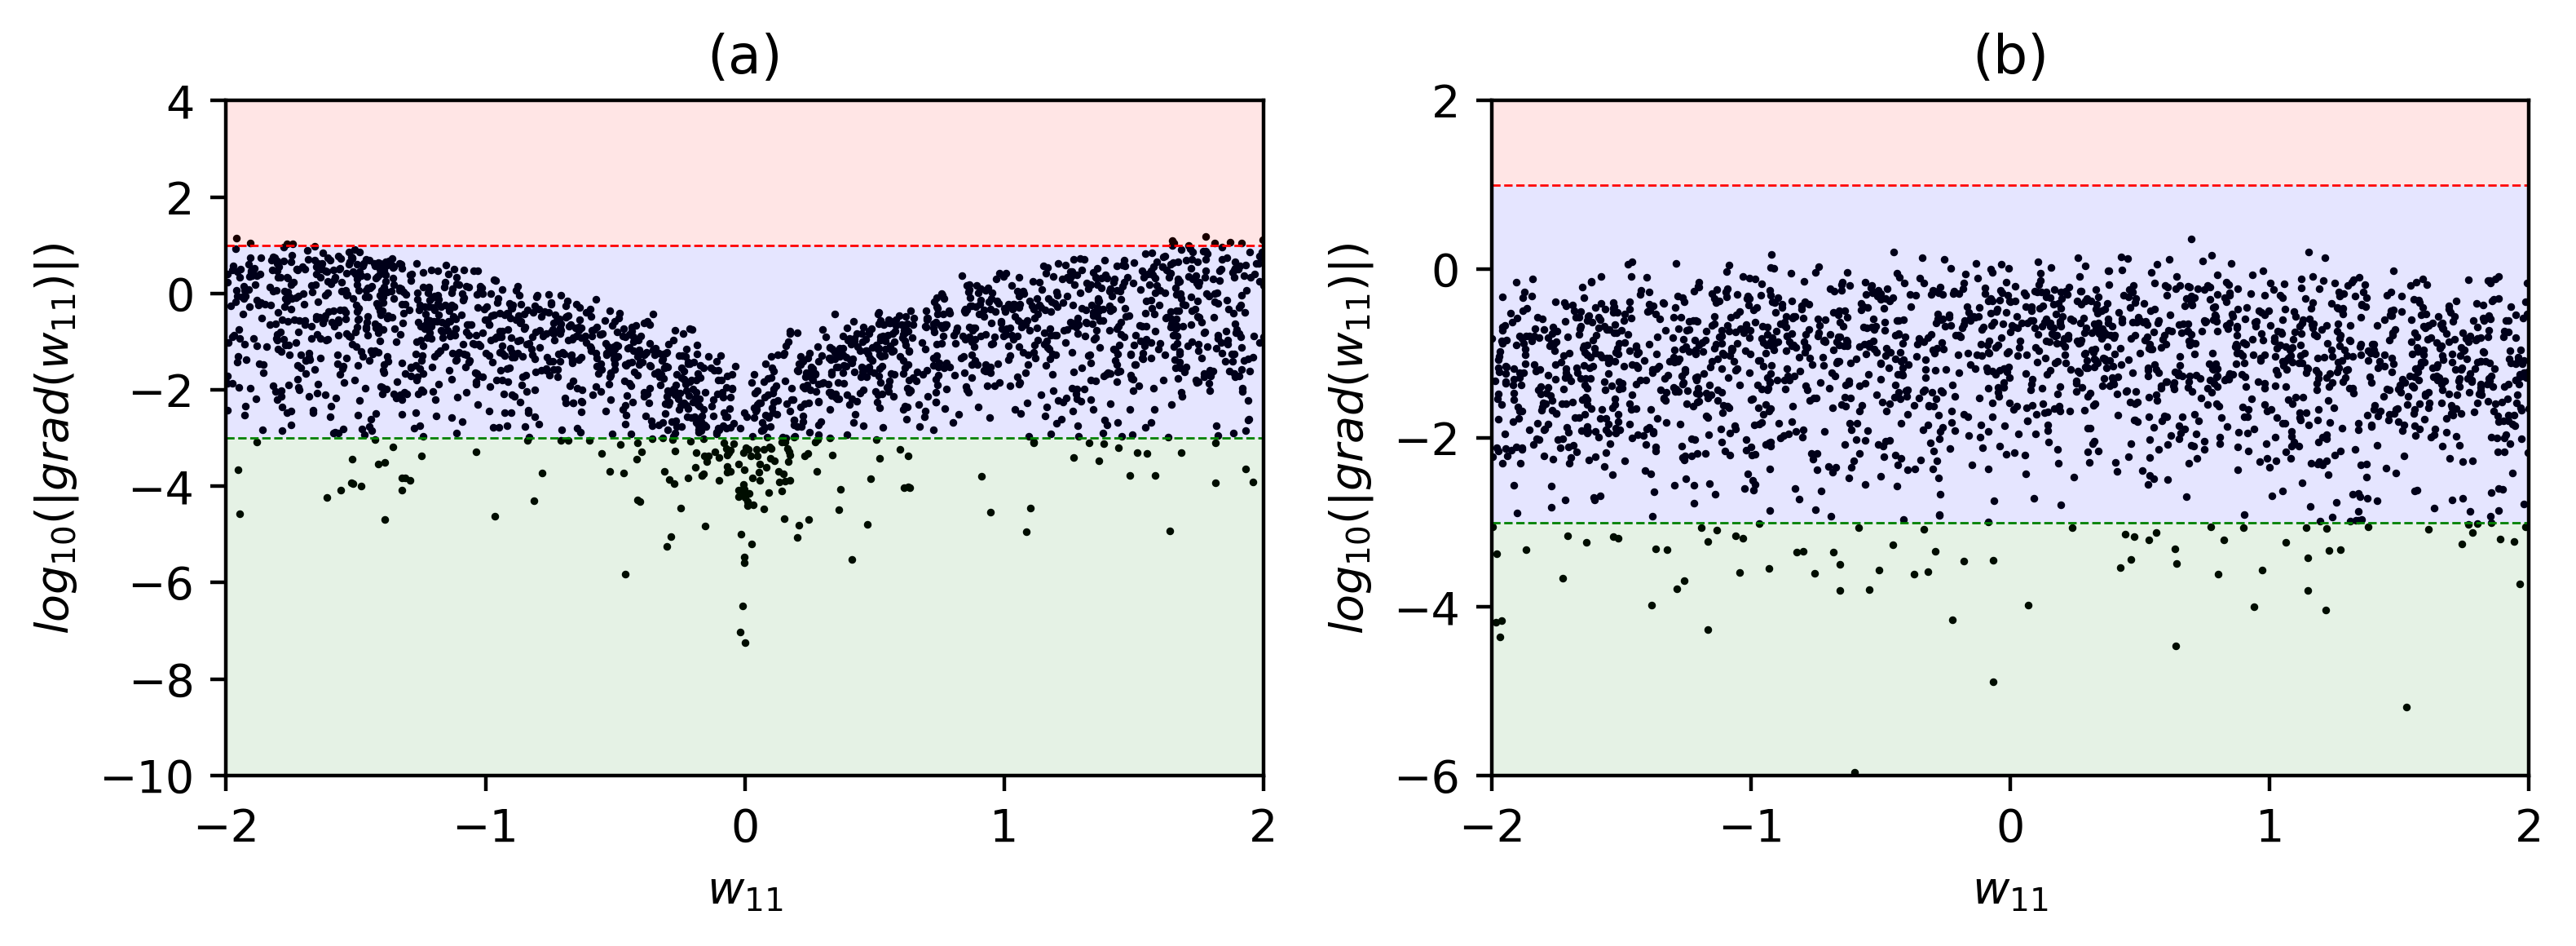

In [9]:
%matplotlib inline
x = [-2, 2]
y1 = [1, 1]
y2 = [-3, -3]
plt.figure(figsize=(8, 3), dpi=400)
plt.subplot(1, 2, 1)
grad = np.log10(np.abs(grad_ar_dx2[:, 1]))
plt.scatter(grad_ar_dx2[:, 0], grad, s=0.5, c='k')
plt.plot(x, y1, c='r', linestyle='--', linewidth=0.5)
plt.plot(x, y2, c='g', linestyle='--', linewidth=0.5)
plt.fill_between(x, y1, 8, facecolor='r', alpha=0.1)
plt.fill_between(x, -20, y2, facecolor='g', alpha=0.1)
plt.fill_between(x, y2, y1, facecolor='b', alpha=0.1)
plt.xlim(-2, 2)
plt.ylim(-10, 4)
plt.xlabel('$ w_{11} $')
plt.ylabel('$ log_{10}( {| grad(w_{11}) |}) $') # {\left|{w_11}\right|} 
plt.title('(a)')

plt.subplot(1, 2, 2)
grad = np.log10(np.abs(grad_ar_dy[:, 1]))
plt.scatter(grad_ar_dy[:, 0], grad, s=0.5, c='k')
plt.plot(x, y1, c='r', linestyle='--', linewidth=0.5)
plt.plot(x, y2, c='g', linestyle='--', linewidth=0.5)
plt.fill_between(x, y1, 8, facecolor='r', alpha=0.1)
plt.fill_between(x, -20, y2, facecolor='g', alpha=0.1)
plt.fill_between(x, y2, y1, facecolor='b', alpha=0.1)
plt.xlim(-2, 2)
plt.ylim(-6, 2)
plt.xlabel('$ w_{11} $')
plt.ylabel('$ log_{10}( {| grad(w_{11}) |}) $') # {\left|{w_11}\right|} 
plt.title('(b)')
plt.tight_layout()
plt.show()